<a href="https://colab.research.google.com/github/ersmythe/MAT421/blob/main/Module_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 20.1 Numerical Differentiation Problem Statement
Numerical grid: a set of discrete points spanning a function's domain with even spacing

Data following a numerical grid is considered discrete, and a function solved over a grid is considered discretized. A real-life example of data over a numerical grid is a sensor that takes a measurement every 1 second (or any other consistent length of time). The goal of numerical differentiation is to approximate the derivative of a function on a numerical grid.

# 20.2 Finite Difference Approximating Derivatives
The definition of a derivative at point a is $f'(a)=lim_{x→a} \frac{f(x)-f(a)}{x-a}$

A derivative is the slope of a function at a given point. We can estimate this slope discretely in a few different ways:

Forward difference: $f'(x_j)=\frac{f(x_{j+1})-f(x_j)}{x_{j+1}-x_j}$

Backward difference: $f'(x_j)=\frac{f(x_j)-f(x_{j-1})}{x_j-x_{j-1}}$

Central difference: $f'(x_j)=\frac{f(x_{j+1})-f(x_{j-1})}{x_{j+1}-x_{j-1}}$

In [ ]:
# Base function is f(x)=x^3
import numpy as np

numgrid=np.linspace(-5, 5, num=21)
print(numgrid)
index = np.where(numgrid == 3)[0][0]
f = numgrid**3
f_prime = 3*numgrid

# Analytical (exact) derivative
actual_deriv = 3*3**2

# Forward difference
forward_diff = (f[index+1] - f[index])/(numgrid[index+1] - numgrid[index])

# Backward difference
backward_diff = (f[index] - f[index-1])/(numgrid[index] - numgrid[index-1])

# Central difference
central_diff = (f[index+1] - f[index-1])/(numgrid[index+1] - numgrid[index-1])

print("Actual derivative:", actual_deriv)
print("Forward difference:", forward_diff)
print("Backward difference:", backward_diff)
print("Central difference:", central_diff)


[-5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5
  2.   2.5  3.   3.5  4.   4.5  5. ]
Actual derivative: 27
Forward difference: 31.75
Backward difference: 22.75
Central difference: 27.25


Using the Taylor series of f can let us find the order of the accuracy for these three methods. We write this as $O(h^p)$, and we say that p is the order of accuracy. We generally want a higher order of accuracy. The order of accuracy for both forward and backward difference approximations is 1. The order of accuracy for the central difference approximation is 2, so it is generally more accurate, which matches with the coded example above.

# 20.3 Approximating of Higher Order Derivatives
We can also use a Taylor series approximation to solve for higher order derivatives. For example, this method yields that $f"(x_j)≃\frac{f(x_{j+1})-2f(x_j)+f(x_{j-1})}{h^2}$, which has an accuracy of order 2.

# 20.4 Numerical Differentiation with Noise
With real data, there is almost always some amount of noise. This is added randomness in the dependent measurement that results from inaccuracies and outside disturbances. Noise can be amplified when approximating a derivative, as shown in the next example:

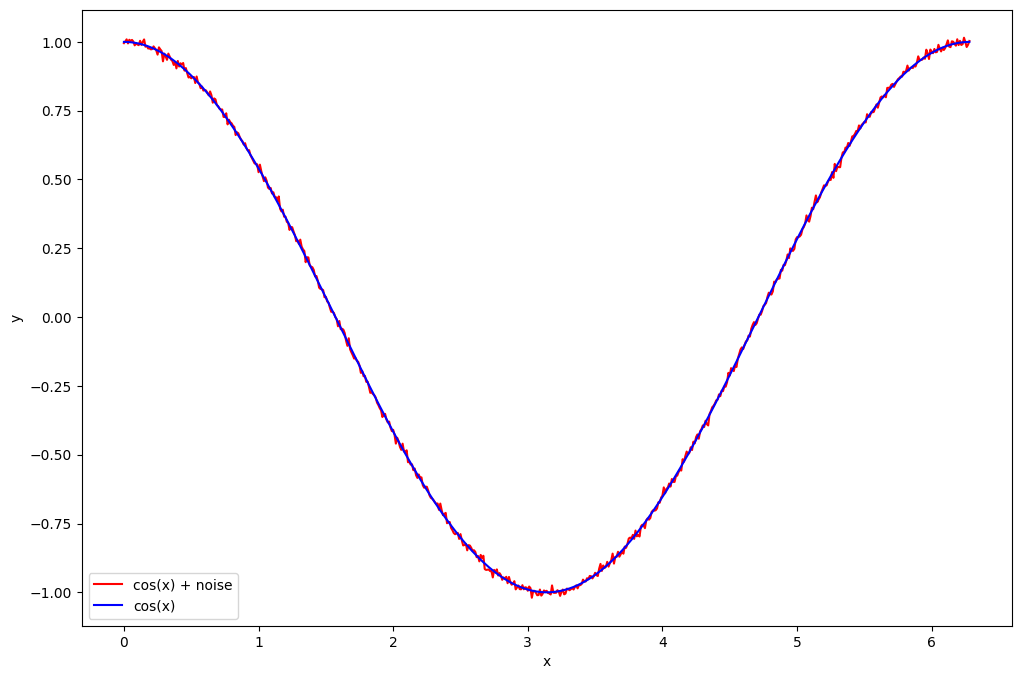

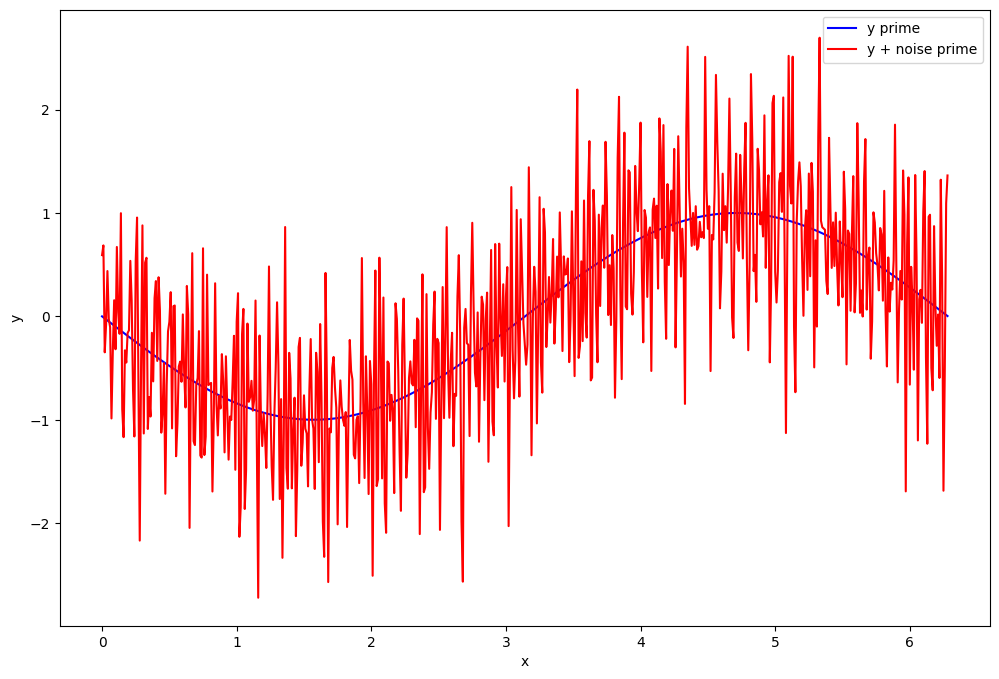

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 2*np.pi, 0.01)
y = np.cos(x) # base function is y = cos(x)
y_noise = y + np.random.normal(0, 0.01, len(x)) # add random noise following a normal distribution

plt.figure(figsize = (12, 8))
plt.plot(x, y_noise, 'r-', label = 'cos(x) + noise')
plt.plot(x, y, 'b-', label = 'cos(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

der = -np.sin(x)
der_noise = np.gradient(y_noise, x)

plt.figure(figsize = (12, 8))
plt.plot(x, der, 'b-', label = 'y prime')
plt.plot(x, der_noise, 'r-', label = 'y + noise prime')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()